# Introduction to Machine Learning — 2024/2025 Supervised Learning

In the following exercises the objective is to program algorithms that, given examples and
an expected output, learn to mimic the behavior present in the data.

In [664]:
# load important packages

import numpy as np
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
from tabulate import tabulate


### Exercise 1

The “network” in Fig. 1 represents a perceptron with two inputs and an output that can also be described by the following equations:

    o=f(s), s=w0 +w1 ·x1 +w2 ·x2 
    f(s)=   1, if s>0.5 
            0, if s≤0.5

1. Choose one of the binary operations (AND or OR) and build two vectors: one with all the different input combinations of two bit patterns (4 vectors): where 0 stands for FALSE and 1 for TRUE ; and another vector containing the target / desired response, d, for each of the corresponding input vectors, as result of the chosen operation, namely: OR {0, 1, 1, 1} or AND {0, 0, 0, 1}.

In [665]:
arrayBitPatterns = np.array(((0,0), (0,1), (1,0), (1,1)))

arrayANDSolution = np.array((0,0,0,1))
arrayORSolution = np.array((0,1,1,1))
print(arrayBitPatterns)
print(arrayANDSolution)
print(arrayORSolution)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]
[0 1 1 1]


2. Initialize w0, w1, and w2 to small random values and, for each input pattern, calculate the corresponding output, storing it in vector o.

In [666]:
def perceptron(w0, w1, w2, arrayBitPatterns):
    listOutputPattern = []
    for bitPair in arrayBitPatterns:
        x1 = bitPair[0]
        x2 = bitPair[1]
        s = w0 + w1 * x1 + w2 * x2
        if s > 0.5:
            listOutputPattern.append(1)
        if s <= 0.5:
            listOutputPattern.append(0)
    return(listOutputPattern)
    

w0 = 0
w1 = 0.2
w2 = 0.2


o = perceptron(w0, w1, w2, arrayBitPatterns)
o

[0, 0, 0, 0]

In [667]:
# oUnderstandable = []
# o = []
# for i in range(10):
#     w0 = round(random.random(), 2)
#     w1 = round(random.random(),2)
#     w2 = round(random.random(), 2)

#     oUnderstandable.append(f"w0: {w0}, w1: {w1}, w2: {w2}, output: {perceptron(w0, w1, w2, arrayBitPatterns)}")
#     o.append(perceptron(w0, w1, w2, arrayBitPatterns))

# print(oUnderstandable)
# print(o)


3. Calculate the difference / error (e = d − o) between the desired response (d) and the output (o), for each output.

In [668]:
d = arrayANDSolution
e = d - o 
e

array([0, 0, 0, 1])

In [669]:
# error = []
# for item in o:
#     e = d - o
#     error.append(e)

# e

4. For each error in e, add to the update term for w0 (∆w0), w1 (∆w1), and w2 (∆w2) according to:


    ∆w0 = ∆w0 + α · e

    ∆w1 =∆w1 +α·x1 · e
    
    ∆w2 =∆w2 +α·x2 · e


In [670]:
alpha = 0.0001
w0 = round(random.random(), 2)
w1 = round(random.random(),2)
w2 = round(random.random(), 2)

o = perceptron(w0, w1, w2, arrayBitPatterns)

e = d - o
arrayErrorsAndWeights = np.zeros((4,4))
position = 0
for bitPair in arrayBitPatterns:
    x1 = bitPair[0]
    x2 = bitPair[1]

    if e[position] != 0:
        w0 += alpha * e[position]
        w1 += alpha * e[position] * x1
        w2 += alpha * e[position] * x2

    arrayErrorsAndWeights[position] = [e[position], w0, w1, w2]

    position += 1

arrayErrorsAndWeights

array([[0.  , 0.08, 0.37, 0.08],
       [0.  , 0.08, 0.37, 0.08],
       [0.  , 0.08, 0.37, 0.08],
       [0.  , 0.08, 0.37, 0.08]])

5. Prepare your code to cycle through the whole dataset (in this case, 4 examples) several times doing the above procedure (to train for several "epochs").
6. After all examples are presented (at the end of each epoch), update w0, w1 and w2. so that in the next iteration the error will decrease. Repeat for 20 epochs.

In [671]:
alpha = 0.05
w0 = round(random.random(), 2)
w1 = round(random.random(),2)
w2 = round(random.random(), 2)
numberEpochs = 20
allEpochsArrayErrorAndWeights = np.zeros((numberEpochs, 4, 4))

for i in range(numberEpochs):
    o = perceptron(w0, w1, w2, arrayBitPatterns)

    e = d - o
    arrayErrorsAndWeights = np.zeros((4,4))
    position = 0
    for bitPair in arrayBitPatterns:
        x1 = bitPair[0]
        x2 = bitPair[1]

        if e[position] != 0:
            w0 += alpha * e[position]
            w1 += alpha * e[position] * x1
            w2 += alpha * e[position] * x2

        arrayErrorsAndWeights[position] = [e[position], w0, w1, w2]

        position += 1

    #print(arrayErrorsAndWeights)
    allEpochsArrayErrorAndWeights[i] = arrayErrorsAndWeights

print(allEpochsArrayErrorAndWeights)

[[[ 0.    0.01  0.93  0.63]
  [-1.   -0.04  0.93  0.58]
  [-1.   -0.09  0.88  0.58]
  [ 0.   -0.09  0.88  0.58]]

 [[ 0.   -0.09  0.88  0.58]
  [ 0.   -0.09  0.88  0.58]
  [-1.   -0.14  0.83  0.58]
  [ 0.   -0.14  0.83  0.58]]

 [[ 0.   -0.14  0.83  0.58]
  [ 0.   -0.14  0.83  0.58]
  [-1.   -0.19  0.78  0.58]
  [ 0.   -0.19  0.78  0.58]]

 [[ 0.   -0.19  0.78  0.58]
  [ 0.   -0.19  0.78  0.58]
  [-1.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]]

 [[ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]]

 [[ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]]

 [[ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]]

 [[ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]]

 [[ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 0.   -0.24  0.73  0.58]
  [ 

In [672]:
saveResultsForGraph = allEpochsArrayErrorAndWeights
saveResultsForGraph

array([[[ 0.  ,  0.01,  0.93,  0.63],
        [-1.  , -0.04,  0.93,  0.58],
        [-1.  , -0.09,  0.88,  0.58],
        [ 0.  , -0.09,  0.88,  0.58]],

       [[ 0.  , -0.09,  0.88,  0.58],
        [ 0.  , -0.09,  0.88,  0.58],
        [-1.  , -0.14,  0.83,  0.58],
        [ 0.  , -0.14,  0.83,  0.58]],

       [[ 0.  , -0.14,  0.83,  0.58],
        [ 0.  , -0.14,  0.83,  0.58],
        [-1.  , -0.19,  0.78,  0.58],
        [ 0.  , -0.19,  0.78,  0.58]],

       [[ 0.  , -0.19,  0.78,  0.58],
        [ 0.  , -0.19,  0.78,  0.58],
        [-1.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58]],

       [[ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58]],

       [[ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58]],

       [[ 0.  , -0.24,  0.73,  0.58],
        [ 0.  , -0.24,  0.73,  0.58],


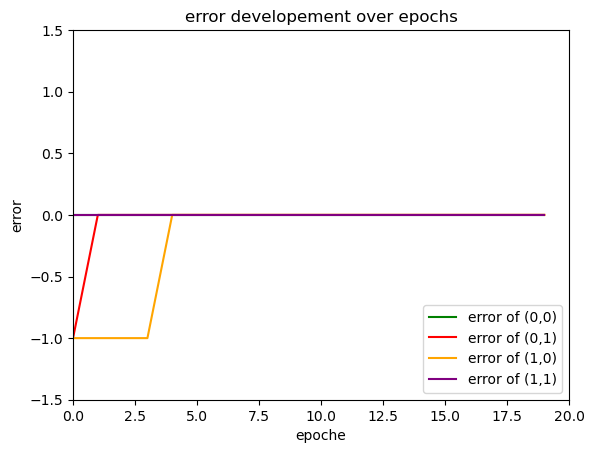

In [673]:
# visualize (a): Plot the value of the error at the end of each epoch, how does it behave?

numberEpochs = range(len(saveResultsForGraph))
numberEpochs

error0 = []
error1 = []
error2 = []
error3 = []

for array in saveResultsForGraph:
    error0.append(array[0,0])
    error1.append(array[1,0])
    error2.append(array[2,0])
    error3.append(array[3,0])

plt.plot(numberEpochs, error0, "-", color = "green", label = "error of (0,0)") 
plt.plot(numberEpochs, error1, "-", color = "red", label = "error of (0,1)") 
plt.plot(numberEpochs, error2, "-", color = "orange", label = "error of (1,0)") 
plt.plot(numberEpochs, error3, "-", color = "purple", label = "error of (1,1)") 

plt.ylabel("error")
plt.xlabel("epoche")
plt.title("error developement over epochs")
plt.legend(loc='lower right')

plt.xlim(0, len(numberEpochs))
plt.ylim(-1.5, 1.5)
#plt.axis("equal") 
plt .show()    

###  How do the errors behave over the epochs?
In the beginning, each error of each output can either be -1 or already 0. (Predicting false or correct). By learning from the feedback the weights are improved so that in the end all errors will converge to 0. (Meaning that the output is correct)

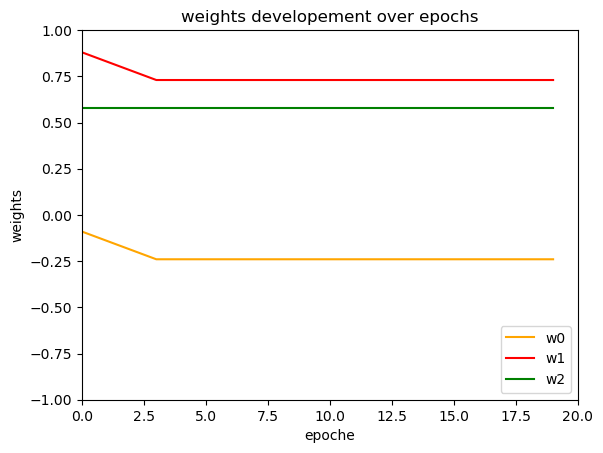

In [674]:
# visualize (b) Plot the value of each weight at the end of each training epoch. 

numberEpochs = range(len(saveResultsForGraph))
numberEpochs

w0EndEpochs = []
w1EndEpochs = []
w2EndEpochs = []

for array in saveResultsForGraph:
    w0EndEpochs.append(array[3,1])
    w1EndEpochs.append(array[3,2])
    w2EndEpochs.append(array[3,3])

plt.plot(numberEpochs, w0EndEpochs, "-", color = "orange", label = "w0") 
plt.plot(numberEpochs, w1EndEpochs, "-", color = "red", label = "w1") 
plt.plot(numberEpochs, w2EndEpochs, "-", color = "green", label = "w2") 


plt.ylabel("weights")
plt.xlabel("epoche")
plt.title("weights developement over epochs")
plt.legend(loc='lower right')

plt.xlim(0, len(numberEpochs))
plt.ylim(-1, 1)
plt.show()

### Are the values converging? if so, do they converge to similar values in different runs (with different random intializations)?

They do converge, and eventhough the exact values are different, for the AND perceptron all weights converge to values between 0 and 0.5 .
For the OR perceptron they converge to values between 0 and 1 so that at least 2 of the weights are above 0.5, so that adding them will always surpass the threshold.

### (c) What is the effect of increasing/decreasing the α parameter? Can you tell (approximately) what is the "best" value for α?

The higher alpga, the stronger are the weights changes whenever an output is wrong. When alpha is too small, improving the weights in order to make good predictions is too slow and needs many epochs. When alpha is too big, the changes in weights will be too big and the correct a´weights are "overshot".

A good value for alpha: 0.05???


### (d) How many epochs (iterations through the whole set) did it take to get all examples right? (i.e. ∀i : di = oi). 
Repeat the experiment 30 times with different random values for the initial weights and present the average and standard deviation of the number of epochs it took to converge.

In [675]:
alpha = 0.05
listWithNumberEpochs = []


for i in range(30):
    epochsNeeded = 0

    w0 = round(random.random(), 2)
    w1 = round(random.random(),2)
    w2 = round(random.random(), 2)
    d = arrayANDSolution
    o = np.array((perceptron(w0, w1, w2, arrayBitPatterns)))

    while not np.array_equal(d, o):
        e = d - o
        arrayErrorsAndWeights = np.zeros((4,4))
        position = 0
        for bitPair in arrayBitPatterns:
            x1 = bitPair[0]
            x2 = bitPair[1]

            if e[position] != 0:
                w0 += alpha * e[position]
                w1 += alpha * e[position] * x1
                w2 += alpha * e[position] * x2

            arrayErrorsAndWeights[position] = [e[position], w0, w1, w2]
            position += 1
        o = np.array((perceptron(w0, w1, w2, arrayBitPatterns)))
        epochsNeeded += 1
    
    listWithNumberEpochs.append(epochsNeeded)

print(listWithNumberEpochs)
        
average = sum(listWithNumberEpochs) / len(listWithNumberEpochs)      
standardDeviation = np.std(listWithNumberEpochs)

print(f"average number of epochs till convergence: {round(average, 0)} \n standard deviation: {round(standardDeviation, 2)}.")


    

[8, 13, 8, 6, 3, 6, 14, 9, 8, 8, 7, 2, 9, 4, 6, 3, 6, 9, 6, 12, 6, 11, 6, 4, 6, 5, 10, 8, 3, 14]
average number of epochs till convergence: 7.0 
 standard deviation: 3.17.


7. Generate 2D points using a multivariate Gaussian distribution.

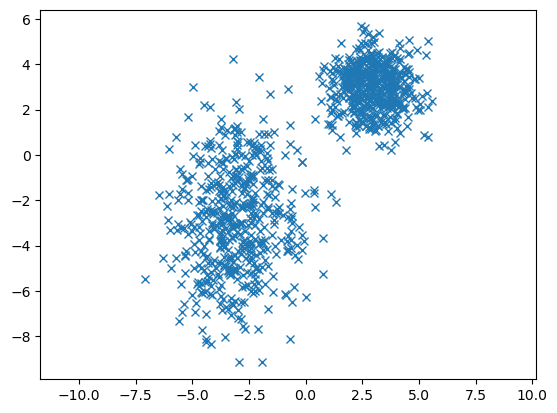

In [676]:
# generate data

mean= [3, 3]
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 500).T

new_col_a = np.zeros((1, a.shape[1]))
a = np.append(a, new_col_a, axis, )

mean= [-3, -3]
cov = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean, cov, 500).T

new_col_b = np.ones((1, b.shape[1]))
b = np.append(b, new_col_b, axis = 0)

c = np.concatenate((a, b) , axis = 1) 
c=c.T
np.random.shuffle(c)
c=c.T

x = c[0] 
y=c[1]
labels=c[2]
plt.plot(x, y, "x") 
plt.axis("equal") 
plt .show()

# save and load data
np.savetxt("testData.csv", c, delimiter=",")
data = genfromtxt('testData.csv', delimiter=',')

8. Use the dataset generated in the previous task as the training set for the same perceptron and train it to partition the two datasets (adjust number of epochs if necessary). Notice that the same program learned two different tasks depending on the dataset used.

In [677]:
dataCopy = data.copy()

In [678]:
# alpha = 0.0001

# w0 = round(random.random(), 2)
# w1 = round(random.random(),2)
# w2 = round(random.random(), 2)

# d = data[2]
# o = np.array((perceptron(w0, w1, w2, dataCopy.T)))

# epochsNeeded = 0
# while not np.array_equal(d, o):

#     e = d - o
#     arrayErrorsAndWeights = np.zeros((1000,4))
#     position = 0
#     for coordinates in data.T:
#         x1 = coordinates[0]
#         x2 = coordinates[1]

#         if e[position] != 0:
#             w0 += alpha * e[position]
#             w1 += alpha * e[position] * x1
#             w2 += alpha * e[position] * x2

#         arrayErrorsAndWeights[position] = [e[position], w0, w1, w2]
#         position += 1

#     o = np.array((perceptron(w0, w1, w2, dataCopy.T)))
#     epochsNeeded += 1

# print(arrayErrorsAndWeights)
# print(epochsNeeded)

In [679]:
dataCopy = data.copy()
alpha = 0.0001
howManyEpochs = 20
w0 = round(random.random(), 2)
w1 = round(random.random(),2)
w2 = round(random.random(), 2)

d = dataCopy[2]
o = np.array((perceptron(w0, w1, w2, dataCopy.T)))

for i in range(howManyEpochs):
    e = d - o
    position = 0
    for coordinates in dataCopy.T:
        x1 = coordinates[0]
        x2 = coordinates[1]

        if e[position] != 0:
            w0 += alpha * e[position]
            w1 += alpha * e[position] * x1
            w2 += alpha * e[position] * x2
        position += 1

    o = np.array((perceptron(w0, w1, w2, dataCopy.T)))


newColumnDataCopy = np.ones((1, dataCopy.shape[1]))
dataCopy = np.append(dataCopy, newColumnDataCopy, axis = 0)
dataCopy[3] = o

print(dataCopy.T)


[[-3.10126454  1.18837405  1.          1.        ]
 [-3.37272664 -2.71911033  1.          1.        ]
 [-1.70423414 -0.15072962  1.          1.        ]
 ...
 [ 2.31405965  2.4202118   0.          0.        ]
 [-2.37790537  0.01351044  1.          1.        ]
 [ 3.36532722  3.89923466  0.          0.        ]]


In [680]:
pointsCorrectRejectionsX = []
pointsFalsePositivesX = []
pointsFalseNegativesX = []
pointsTruePositivesX = []

pointsCorrectRejectionsY = []
pointsFalsePositivesY = []
pointsFalseNegativesY = []
pointsTruePositivesY = []



for i in range(len(dataCopy.T)):
    if dataCopy.T[i][2] == 0 and dataCopy.T[i][3] == 0:
        pointsCorrectRejectionsX.append(dataCopy.T[i][0])
        pointsCorrectRejectionsY.append(dataCopy.T[i][1])

    if dataCopy.T[i][2] == 0 and dataCopy.T[i][3] == 1:
        pointsFalsePositivesX.append(dataCopy.T[i][0])
        pointsFalsePositivesY.append(dataCopy.T[i][1])
    
    if dataCopy.T[i][2] == 1 and dataCopy.T[i][3] == 0:
        pointsFalseNegativesX.append(dataCopy.T[i][0])
        pointsFalseNegativesY.append(dataCopy.T[i][1])

    if dataCopy.T[i][2] == 1 and dataCopy.T[i][3] == 1:
        pointsTruePositivesX.append(dataCopy.T[i][0])
        pointsTruePositivesY.append(dataCopy.T[i][1])


print(len(pointsCorrectRejectionsX))
print(len(pointsCorrectRejectionsY))

print(len(pointsFalsePositivesX))
print(len(pointsFalsePositivesY))
print(len(pointsFalseNegativesX))
print(len(pointsFalseNegativesY))
print(len(pointsTruePositivesX))
print(len(pointsTruePositivesY))

500
500
0
0
13
13
487
487


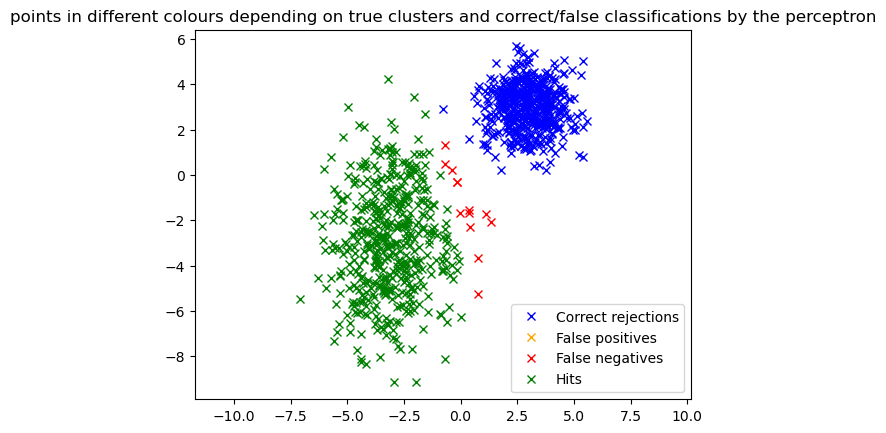

In [681]:
# visualize

plt.plot(pointsCorrectRejectionsX, pointsCorrectRejectionsY, "x", color = "blue", label = "Correct rejections")
plt.plot(pointsFalsePositivesX, pointsFalsePositivesY, "x", color = "orange", label = "False positives")
plt.plot(pointsFalseNegativesX, pointsFalseNegativesY, "x", color = "red", label = "False negatives")
plt.plot(pointsTruePositivesX, pointsTruePositivesY, "x", color = "green", label = "Hits")


plt.title("points in different colours depending on true clusters and correct/false classifications by the perceptron")
plt.legend(loc='lower right')

plt.axis("equal") 
plt.show()

9. Print/Plot the confusion matrix for the above test. Can you relate each of the numbers in the confusion matrix to the points of a given color on the previously generated figure?

In [682]:
# confusion matrix

totalLength = len(dataCopy.T)
numberHits = len(pointsTruePositivesX)
numberCorrectRejections = len(pointsCorrectRejectionsX)
numberFalsePositives = len(pointsFalsePositivesX)
numberFalseNegatives = len(pointsFalseNegativesX)

confusionMatrix = [
    ["1", round(numberHits/totalLength, 2), round(numberFalseNegatives/totalLength, 2)],
    ["0", round(numberFalsePositives/totalLength, 2), round(numberCorrectRejections/totalLength, 2)]
]

head = ["True cluster", "label 1", "label 0"]

tableConfusionMatrix = tabulate(confusionMatrix, headers = head)
print(tableConfusionMatrix)

  True cluster    label 1    label 0
--------------  ---------  ---------
             1       0.49       0.01
             0       0          0.5


10. Print the metrics (accuracy, precision, recall, and F1) for all the tests: metrics should be an average for 30 tests with the same parameters but different initial weights.

In [683]:
dataCopy = data.copy()
alpha = 0.0001
howManyEpochs = 20

saveAccuracy = []
savePrecision = []
saveRecall = []
saveF1Score = []

for i in range(30):

    w0 = round(random.random(), 2)
    w1 = round(random.random(),2)
    w2 = round(random.random(), 2)

    d = dataCopy[2]
    o = np.array((perceptron(w0, w1, w2, dataCopy.T)))

    for i in range(howManyEpochs):
        e = d - o
        position = 0
        for coordinates in dataCopy.T:
            x1 = coordinates[0]
            x2 = coordinates[1]

            if e[position] != 0:
                w0 += alpha * e[position]
                w1 += alpha * e[position] * x1
                w2 += alpha * e[position] * x2
            position += 1

        o = np.array((perceptron(w0, w1, w2, dataCopy.T)))


    newColumnDataCopy = np.ones((1, dataCopy.shape[1]))
    dataCopy = np.append(dataCopy, newColumnDataCopy, axis = 0)
    dataCopy[3] = o


    pointsCorrectRejectionsX = []
    pointsFalsePositivesX = []
    pointsFalseNegativesX = []
    pointsTruePositivesX = []

    pointsCorrectRejectionsY = []
    pointsFalsePositivesY = []
    pointsFalseNegativesY = []
    pointsTruePositivesY = []

    for i in range(len(dataCopy.T)):
        if dataCopy.T[i][2] == 0 and dataCopy.T[i][3] == 0:
            pointsCorrectRejectionsX.append(dataCopy.T[i][0])
            pointsCorrectRejectionsY.append(dataCopy.T[i][1])

        if dataCopy.T[i][2] == 0 and dataCopy.T[i][3] == 1:
            pointsFalsePositivesX.append(dataCopy.T[i][0])
            pointsFalsePositivesY.append(dataCopy.T[i][1])
        
        if dataCopy.T[i][2] == 1 and dataCopy.T[i][3] == 0:
            pointsFalseNegativesX.append(dataCopy.T[i][0])
            pointsFalseNegativesY.append(dataCopy.T[i][1])

        if dataCopy.T[i][2] == 1 and dataCopy.T[i][3] == 1:
            pointsTruePositivesX.append(dataCopy.T[i][0])
            pointsTruePositivesY.append(dataCopy.T[i][1])


    totalLength = len(dataCopy.T)
    numberHits = len(pointsTruePositivesX)
    numberCorrectRejections = len(pointsCorrectRejectionsX)
    numberFalsePositives = len(pointsFalsePositivesX)
    numberFalseNegatives = len(pointsFalseNegativesX)

    accuracy = (numberHits+numberCorrectRejections)/totalLength
    precision = numberHits/(numberHits + numberFalsePositives)
    recall = numberHits/(numberHits + numberFalseNegatives)
    F1Score = (2*precision*recall)/(precision+recall)

    saveAccuracy.append(accuracy)
    savePrecision.append(precision)
    saveRecall.append(recall)
    saveF1Score.append(F1Score)
    



accuracy = round(sum(saveAccuracy)/len(saveAccuracy), 2)
precision = round(sum(savePrecision)/len(savePrecision), 2)
recall = round(sum(saveRecall)/len(saveRecall), 2)
F1Score = round(sum(saveF1Score)/len(saveF1Score), 2)


print(f"average performance after {howManyEpochs} training epochs:")
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1Score: {F1Score}")

average performance after 20 training epochs:
accuracy: 0.99
precision: 1.0
recall: 0.98
F1Score: 0.99


In [684]:
# accuracy = round((numberHits+numberCorrectRejections)/totalLength, 2)
# precision = round(numberHits/(numberHits + numberFalsePositives), 2)
# recall = round(numberHits/(numberHits + numberFalseNegatives), 2)
# F1Score = round((2*precision*recall)/(precision+recall), 2)

# print(f"average performance after {howManyEpochs} training epochs:")
# print(f"accuracy: {accuracy}")
# print(f"precision: {precision}")
# print(f"recall: {recall}")
# print(f"F1Score: {F1Score}")

### Exercise 2

Implement a k-NN classifier that is specifically suited for the dataset in https://archive.ics.uci.edu/ml/datasets/iris.
Given a dataset containing labelled examples (a training set) and a new example (extracted from the test set), the classifier should calculate the euclidean distance from the new example to all the elements of the training set, choose the k closest elements of the training set and output this example classification as the class of the majority of the k closest training set elements (the k-Nearest Neighbors).

1. Split the dataset randomly in two subsets (70% / 30%). Use the bigger subset as the training set and the smaller as the test set. Run all test examples through the classifier and calculate the number of correct predictions over the total number of examples of the test set. Compare the scores of k-NN classifiers for k = 3, 7, and 11. Repeat 30 times, with different dataset splits, for each value of k. Use a boxplot with whiskers graphic to allow easy comparison.


In [685]:
coloumnNames = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data = pd.read_csv("data/iris.data", sep = ",", names = coloumnNames)

In [686]:
# divide data into input features (y) and output criterion (X)
y = data.loc[:, data.columns != 'class']
X = data.loc[:,'class']

In [687]:
# get seperate train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# split the test data again for final test vs cross validation tests
#X_test_for_cross_validation, X_final_test, y_test_for_cross_validation, y_final_test = train_test_split(X_test, y_test, test_size=0.5)


In [688]:
# training data is needed with features and outcomes:
trainingData = y_train.join(X_train)
trainingData

# reindexing
trainingData = trainingData.reset_index()  
trainingData = trainingData.drop(labels = "index", axis = "columns")


In [689]:
# also reindex testdate, therefore first join X and y and then split again

testData = y_test.join(X_test)
testData

# reindexing
testData = testData.reset_index()  
testData = testData.drop(labels = "index", axis = "columns")

y_test = testData.loc[:, data.columns != 'class']
X_test = testData.loc[:,'class']


In [690]:
def getEuclideanDistance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)

    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return(distance)

#getEuclideanDistance([1, 1, 1], [5, 2, 6])

In [691]:
# classifier function
def kNearestNeighbourClassifier(trainData, testData, k):
    dictIndexToDistance = {}
    kMinDistances = []
    index = 0
    for index, dataPoint in trainData.iterrows():
        distance = getEuclideanDistance(dataPoint[:4], testData)
        dictIndexToDistance[index] = distance
        index += 1
    
    for i in range(k):
        minDistance = min(dictIndexToDistance, key = dictIndexToDistance.get)
        kMinDistances.append(minDistance)
        del dictIndexToDistance[minDistance]

    classesOfPointsWithMinDistances = []
    for index in kMinDistances:
        classesOfPointsWithMinDistances.append(trainData.iloc[index]["class"])

    classesOfPointsWithMinDistances = pd.Series(classesOfPointsWithMinDistances, dtype = "category")
    predictedClass = classesOfPointsWithMinDistances.mode()[0]

    return(predictedClass)

# example 
print(kNearestNeighbourClassifier(trainingData, y_test.iloc[0], 3))


Iris-virginica


In [692]:
# run all the test examples and classify
allK = [3, 7, 11]
allSingleAccuraciesInList = []
for k in allK:

    allAccuracies = []
    for i in range(30):

        # get random data splits and preprocess 
        y = data.loc[:, data.columns != 'class']
        X = data.loc[:,'class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        trainingData = y_train.join(X_train)
        trainingData = trainingData.reset_index()  
        trainingData = trainingData.drop(labels = "index", axis = "columns")
        testData = y_test.join(X_test)
        testData = testData.reset_index()  
        testData = testData.drop(labels = "index", axis = "columns")
        y_test = testData.loc[:, data.columns != 'class']
        X_test = testData.loc[:,'class']

        allPredictedClasses = []
        for i in range(len(y_test)):
            predictedClass = kNearestNeighbourClassifier(trainingData, y_test.iloc[i], k)
            allPredictedClasses.append(predictedClass)

        position = 0
        totalCorrectPredictions = 0
        for item in allPredictedClasses:
            if item == X_test[position]:
                totalCorrectPredictions += 1
            position += 1

        accuracy = totalCorrectPredictions/position
        allAccuracies.append(accuracy)

    allSingleAccuraciesInList.append(allAccuracies)
    averageAccuracy = sum(allAccuracies)/len(allAccuracies)
    print(f"Average accuracy for k = {k}: {round(averageAccuracy, 2)}")

Average accuracy for k = 3: 0.96
Average accuracy for k = 7: 0.96
Average accuracy for k = 11: 0.97


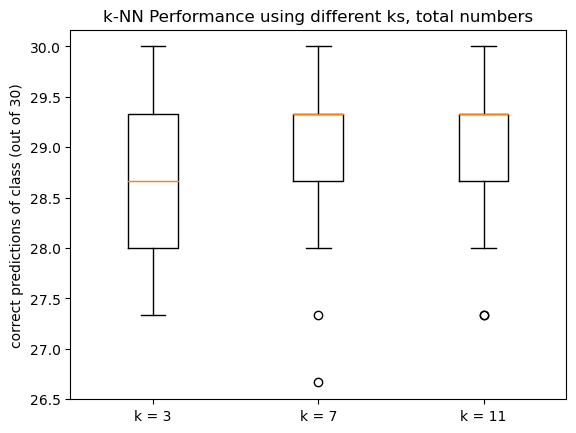

In [695]:
# visualize total numbers
tryout = []
for item in allSingleAccuraciesInList:
    outtry = []
    for i in item:
        outtry.append(i*30)
    tryout.append(outtry)

labels = ["k = 3", "k = 7", "k = 11"]

fig, ax = plt.subplots()
ax.set_ylabel("correct predictions of class (out of 30)")
ax.set_title('k-NN Performance using different ks, total numbers')
bplot = ax.boxplot(tryout, 
                   labels = labels)
plt.show()

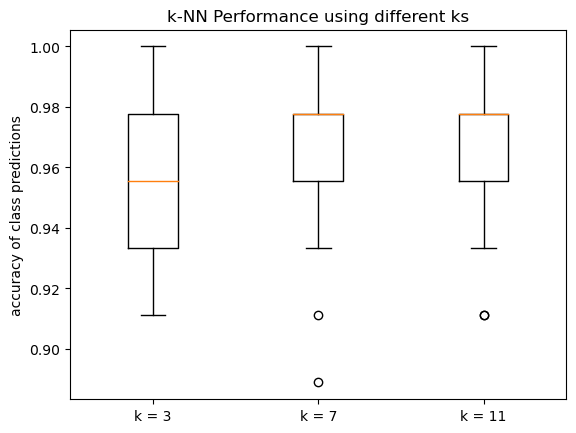

In [696]:
# visualize accuracies
labels = ["k = 3", "k = 7", "k = 11"]

fig, ax = plt.subplots()
ax.set_ylabel("accuracy of class predictions")
ax.set_title('k-NN Performance using different ks')
bplot = ax.boxplot(allSingleAccuraciesInList, 
                   labels = labels)
plt.show()

2. Plot the confusion matrix of one of the tests for each value of k.


In [707]:
 # get random data splits and preprocess 
y = data.loc[:, data.columns != 'class']
X = data.loc[:,'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
trainingData = y_train.join(X_train)
trainingData = trainingData.reset_index()  
trainingData = trainingData.drop(labels = "index", axis = "columns")
testData = y_test.join(X_test)
testData = testData.reset_index()  
testData = testData.drop(labels = "index", axis = "columns")
y_test = testData.loc[:, data.columns != 'class']
X_test = testData.loc[:,'class']

# run all the test examples and classify
allK = [3, 7, 11]
for k in allK:
    allPredictedClasses = []
    for i in range(len(y_test)):
        predictedClass = kNearestNeighbourClassifier(trainingData, y_test.iloc[i], k)
        allPredictedClasses.append(predictedClass)

    position = 0
    numberHitsVirginica = 0
    numberHitsVersicolor = 0
    numberHitsSetosa = 0
    virginicaInsteadVersicolor = 0
    virginicaInsteadSetosa = 0
    versicolorInsteadSetosa = 0
    versicolorInsteadVirginica = 0
    setosaInsteadVirginica = 0
    setosaInsteadVersicolor = 0

    for item in allPredictedClasses:
        # hits
        if item == X_test[position] == "Iris-virginica":
            numberHitsVirginica += 1
        elif item == X_test[position] == "Iris-versicolor":
            numberHitsVersicolor += 1
        elif item == X_test[position] == "Iris-setosa":
            numberHitsSetosa += 1
        # false decisions
        elif item == "Iris-virginica" and X_test[position] == "Iris-versicolor":
            virginicaInsteadVersicolor += 1
        elif item == "Iris-virginica" and X_test[position] == "Iris-setosa":
            virginicaInsteadSetosa += 1

        elif item == "Iris-versicolor" and X_test[position] == "Iris-virginica":
            versicolorInsteadVirginica += 1
        elif item == "Iris-versicolor" and X_test[position] == "Iris-setosa":
            versicolorInsteadSetosa += 1

        elif item == "Iris-setosa" and X_test[position] == "Iris-virginica":
            setosaInsteadVirginica += 1
        elif item == "Iris-setosa" and X_test[position] == "Iris-versicolor":
            setosaInsteadVersicolor += 1   
        position += 1

    # confusion matrix
    confusionMatrix = [
        ["Iris-virginica", numberHitsVirginica, round(versicolorInsteadVirginica, 2) , round(setosaInsteadVirginica, 2)],
        ["Iris-versicolor", round(virginicaInsteadVersicolor, 2), round(numberHitsVersicolor, 2), round(setosaInsteadVersicolor, 2)],
        ["Iris-setosa", round(virginicaInsteadSetosa, 2), round(versicolorInsteadSetosa, 2), round(numberHitsSetosa, 2)]
    ]
    head = ["True cluster", "label Iris-virginica", "label Iris-versicolor", "label Iris-setosa"]
    tableConfusionMatrix = tabulate(confusionMatrix, headers = head)
    print(f"Confusion matrix for k = {k}:")
    print(tableConfusionMatrix)
    print("\n ")


Confusion matrix for k = 3:
True cluster       label Iris-virginica    label Iris-versicolor    label Iris-setosa
---------------  ----------------------  -----------------------  -------------------
Iris-virginica                       13                        0                    0
Iris-versicolor                       1                       18                    0
Iris-setosa                           0                        0                   13

 
Confusion matrix for k = 7:
True cluster       label Iris-virginica    label Iris-versicolor    label Iris-setosa
---------------  ----------------------  -----------------------  -------------------
Iris-virginica                       13                        0                    0
Iris-versicolor                       2                       17                    0
Iris-setosa                           0                        0                   13

 
Confusion matrix for k = 11:
True cluster       label Iris-virginica    label 

3. Considering the dataset presented in Fig. 3, why should k always be an odd number?

If we chose an even number of k, it would be possible that the k closest training examples would be e.g. 3 virginica and 3 setosas, then the algorithm would be undecided which one to categorize as the most common.


wobei das bei k=3 bei 3 kategorien doch auch passieren kann oder?